##About the DataSet

A tunnel boring company uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is.

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
df.shape

(300, 2)

In [7]:
df.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

In [22]:
X = df['Rebound Signal Strength nHz'].values.reshape(-1,1)

In [28]:
y = df['Rock Density kg/m3']

C:\Users\aarav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

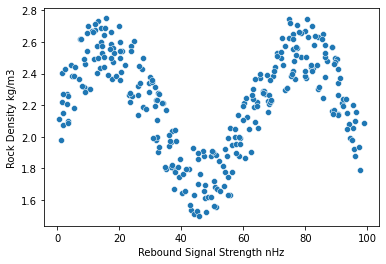

In [29]:
sns.scatterplot('Rebound Signal Strength nHz','Rock Density kg/m3',data=df)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [43]:
from sklearn.linear_model import LinearRegression

In [54]:
def ModelSelection(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print('The RMSE is:',rmse)
    print('The MAE is:',mae)
    
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot('Rebound Signal Strength nHz','Rock Density kg/m3',data=df)
    
    plt.plot(signal_range,signal_preds)

The RMSE is: 0.1523487028635337
The MAE is: 0.11877297474442378
The RMSE is: 0.13730685016923647
The MAE is: 0.12198383614100558
The RMSE is: 0.13277855732740926
The MAE is: 0.11635971693292672


C:\Users\aarav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aarav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aarav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


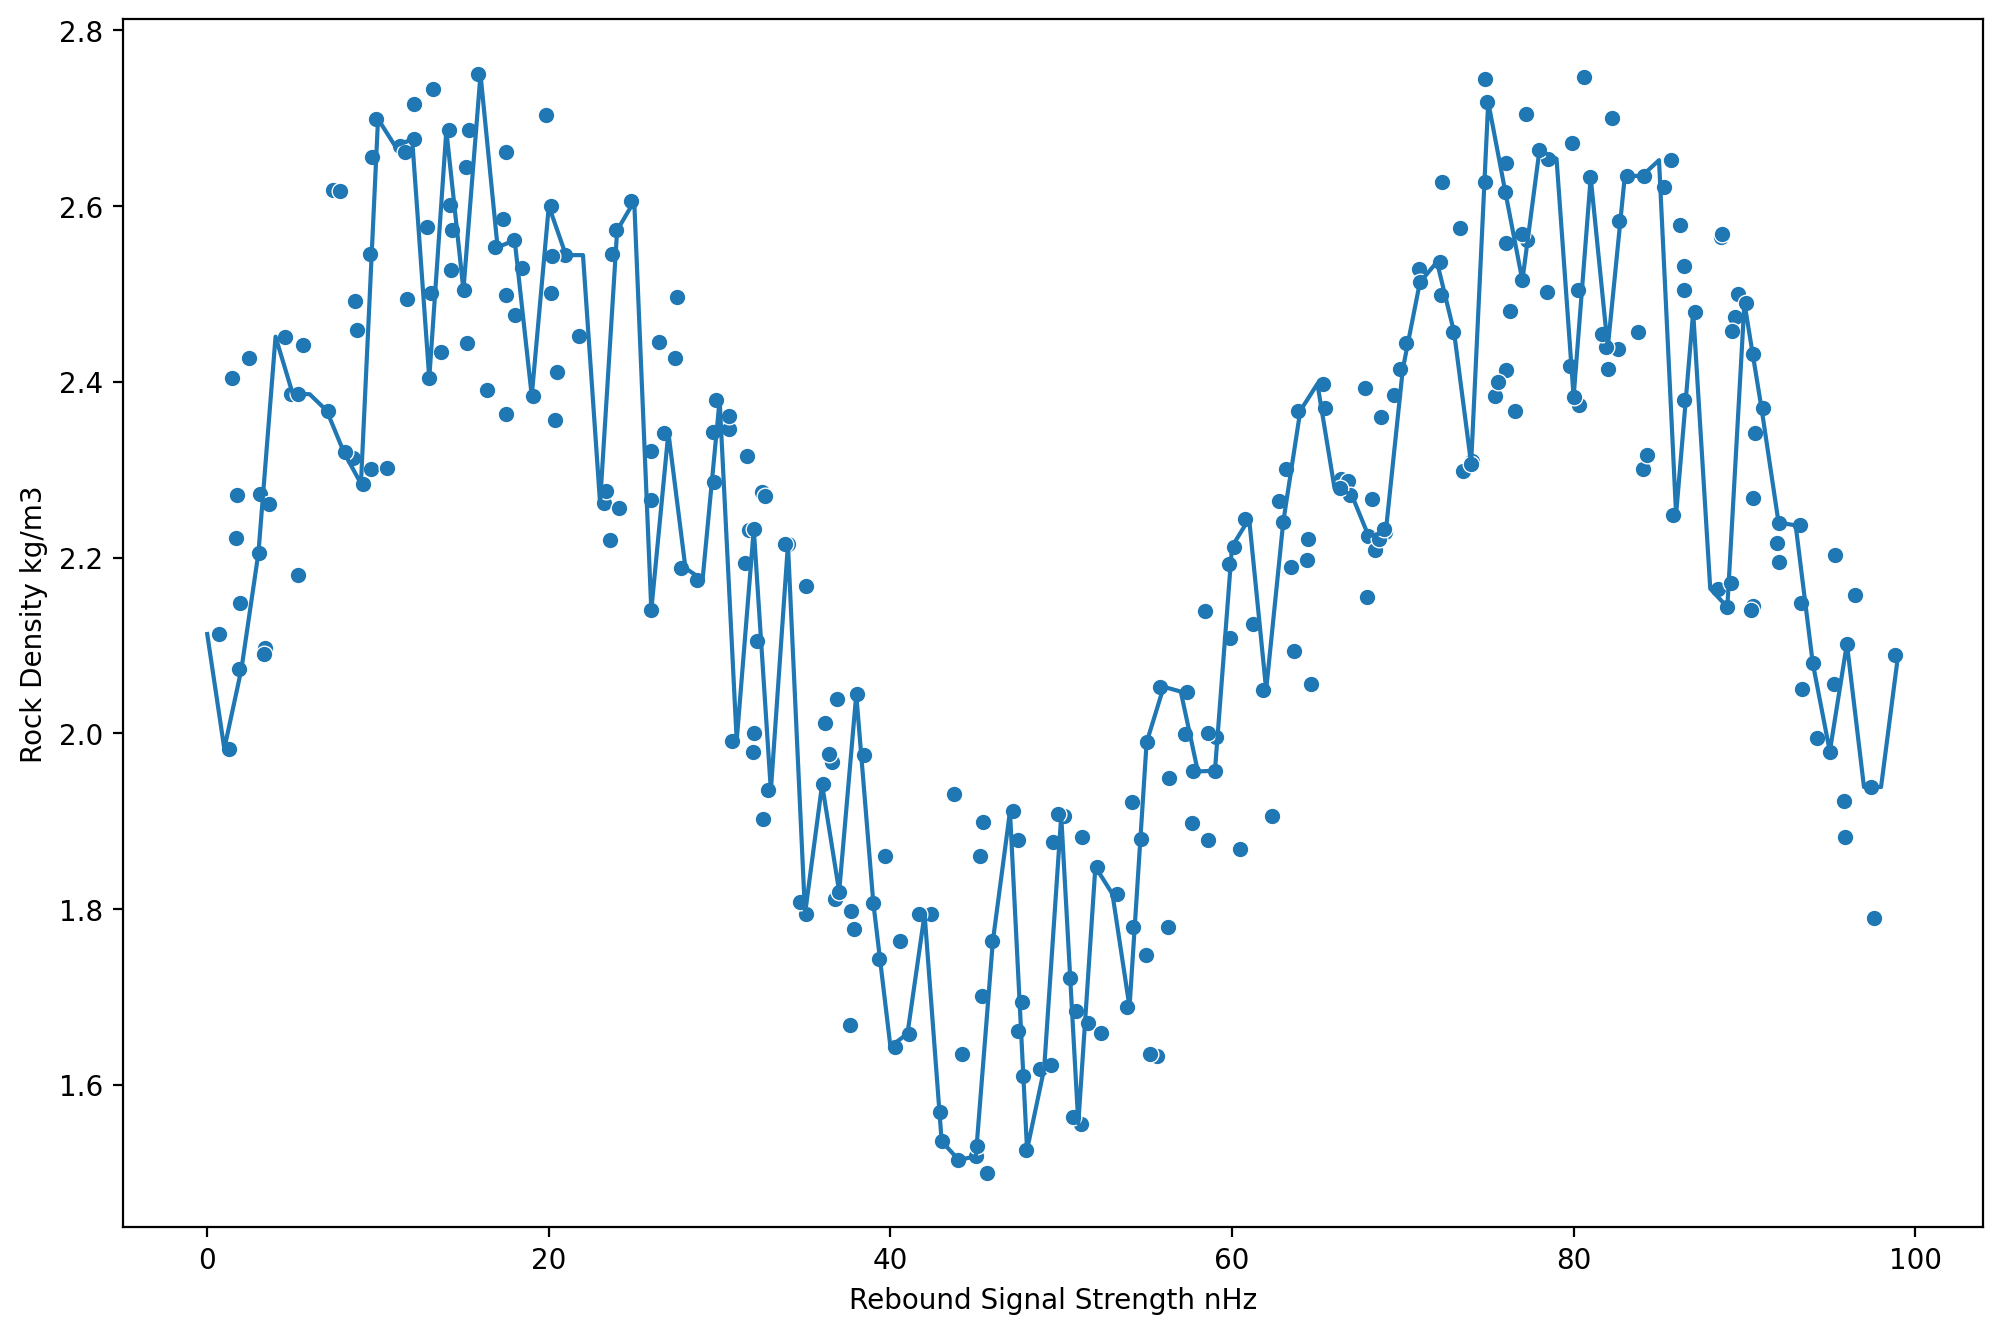

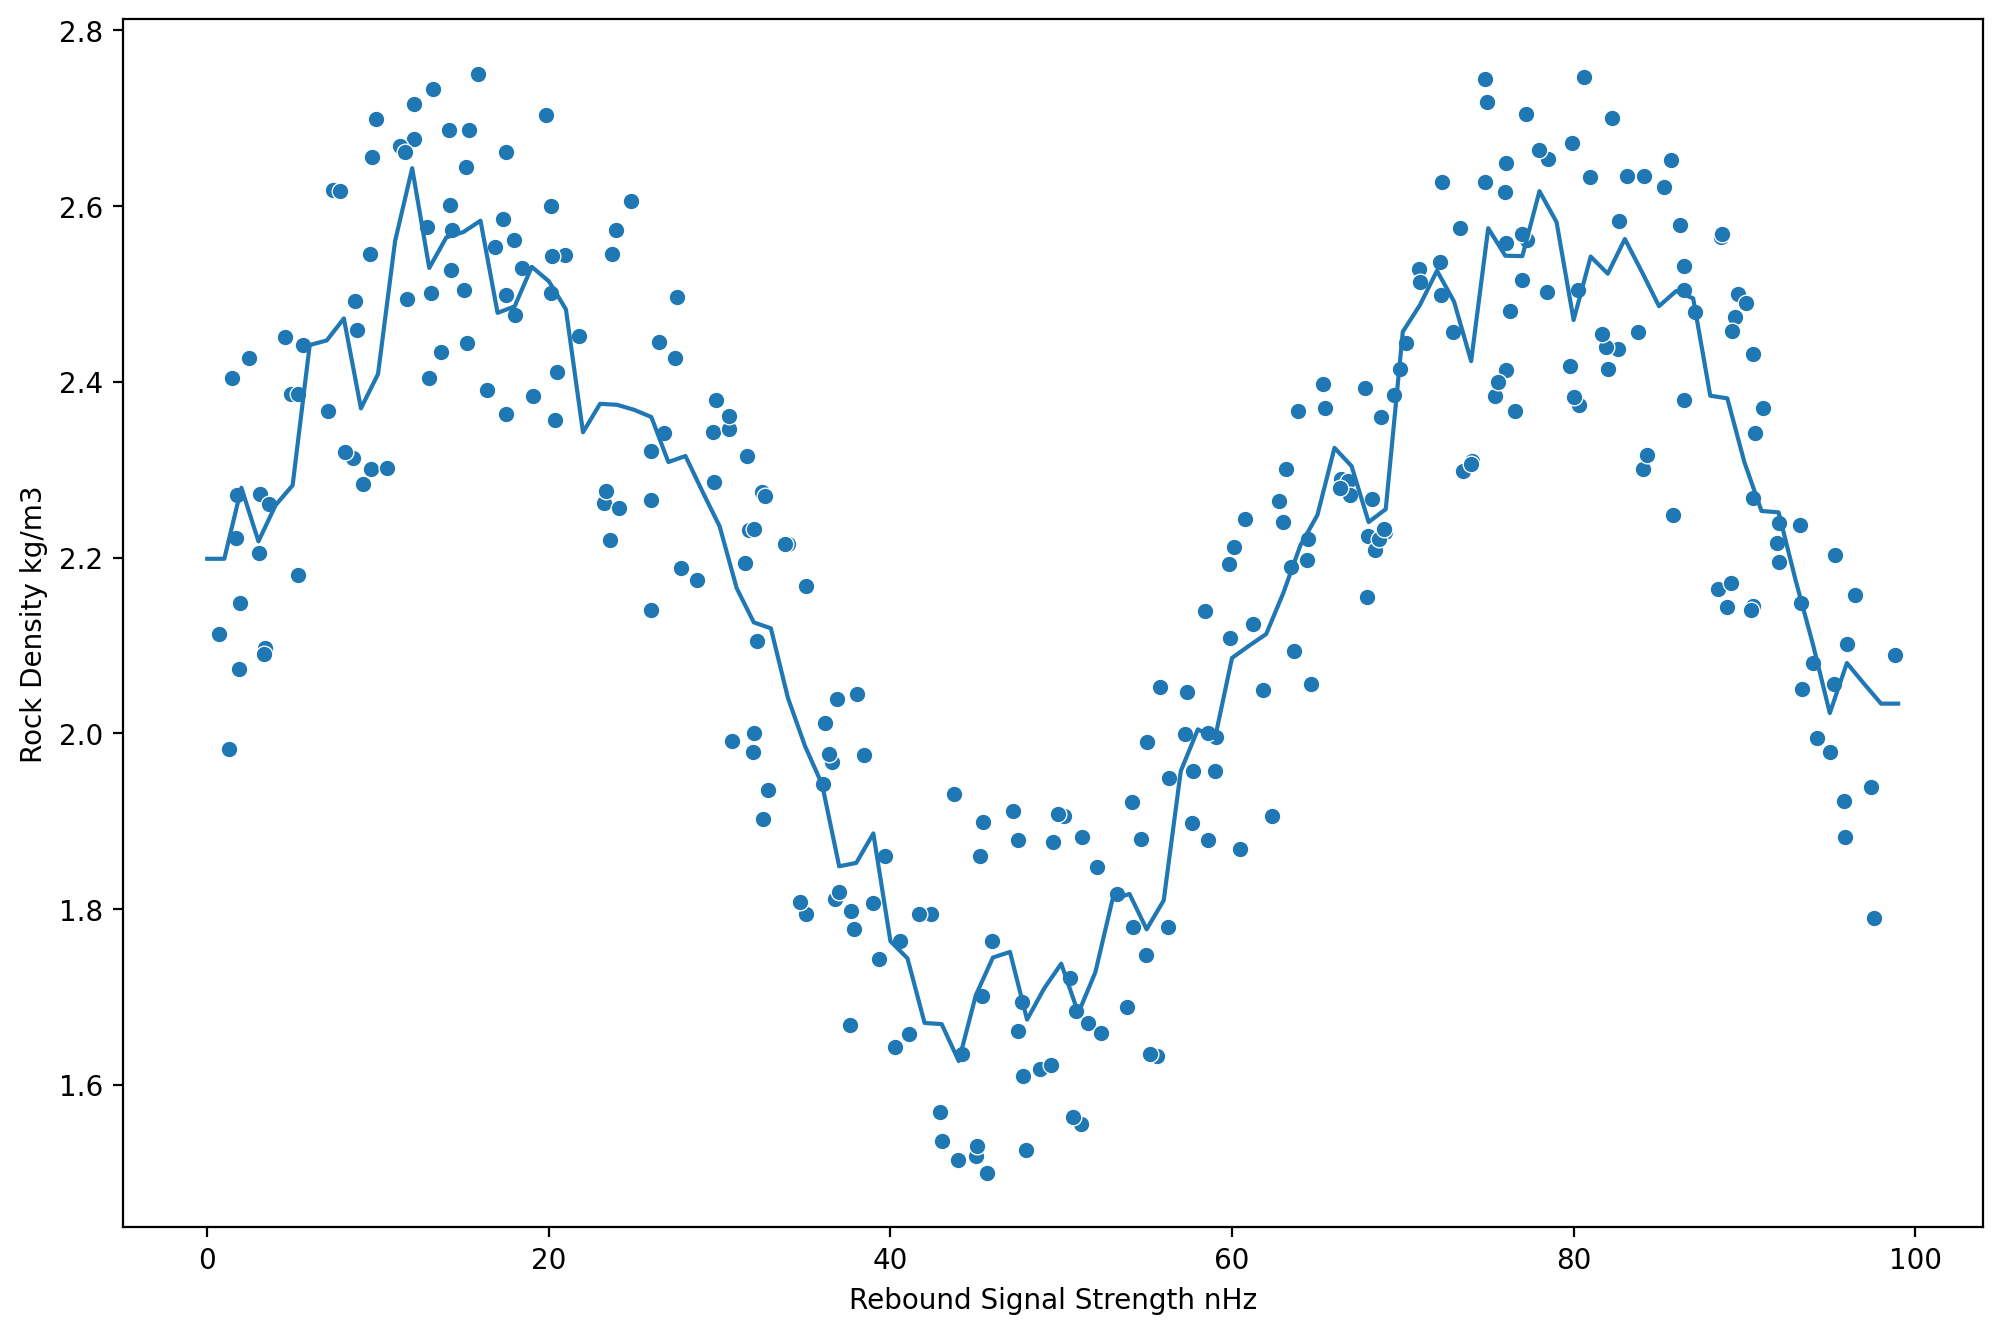

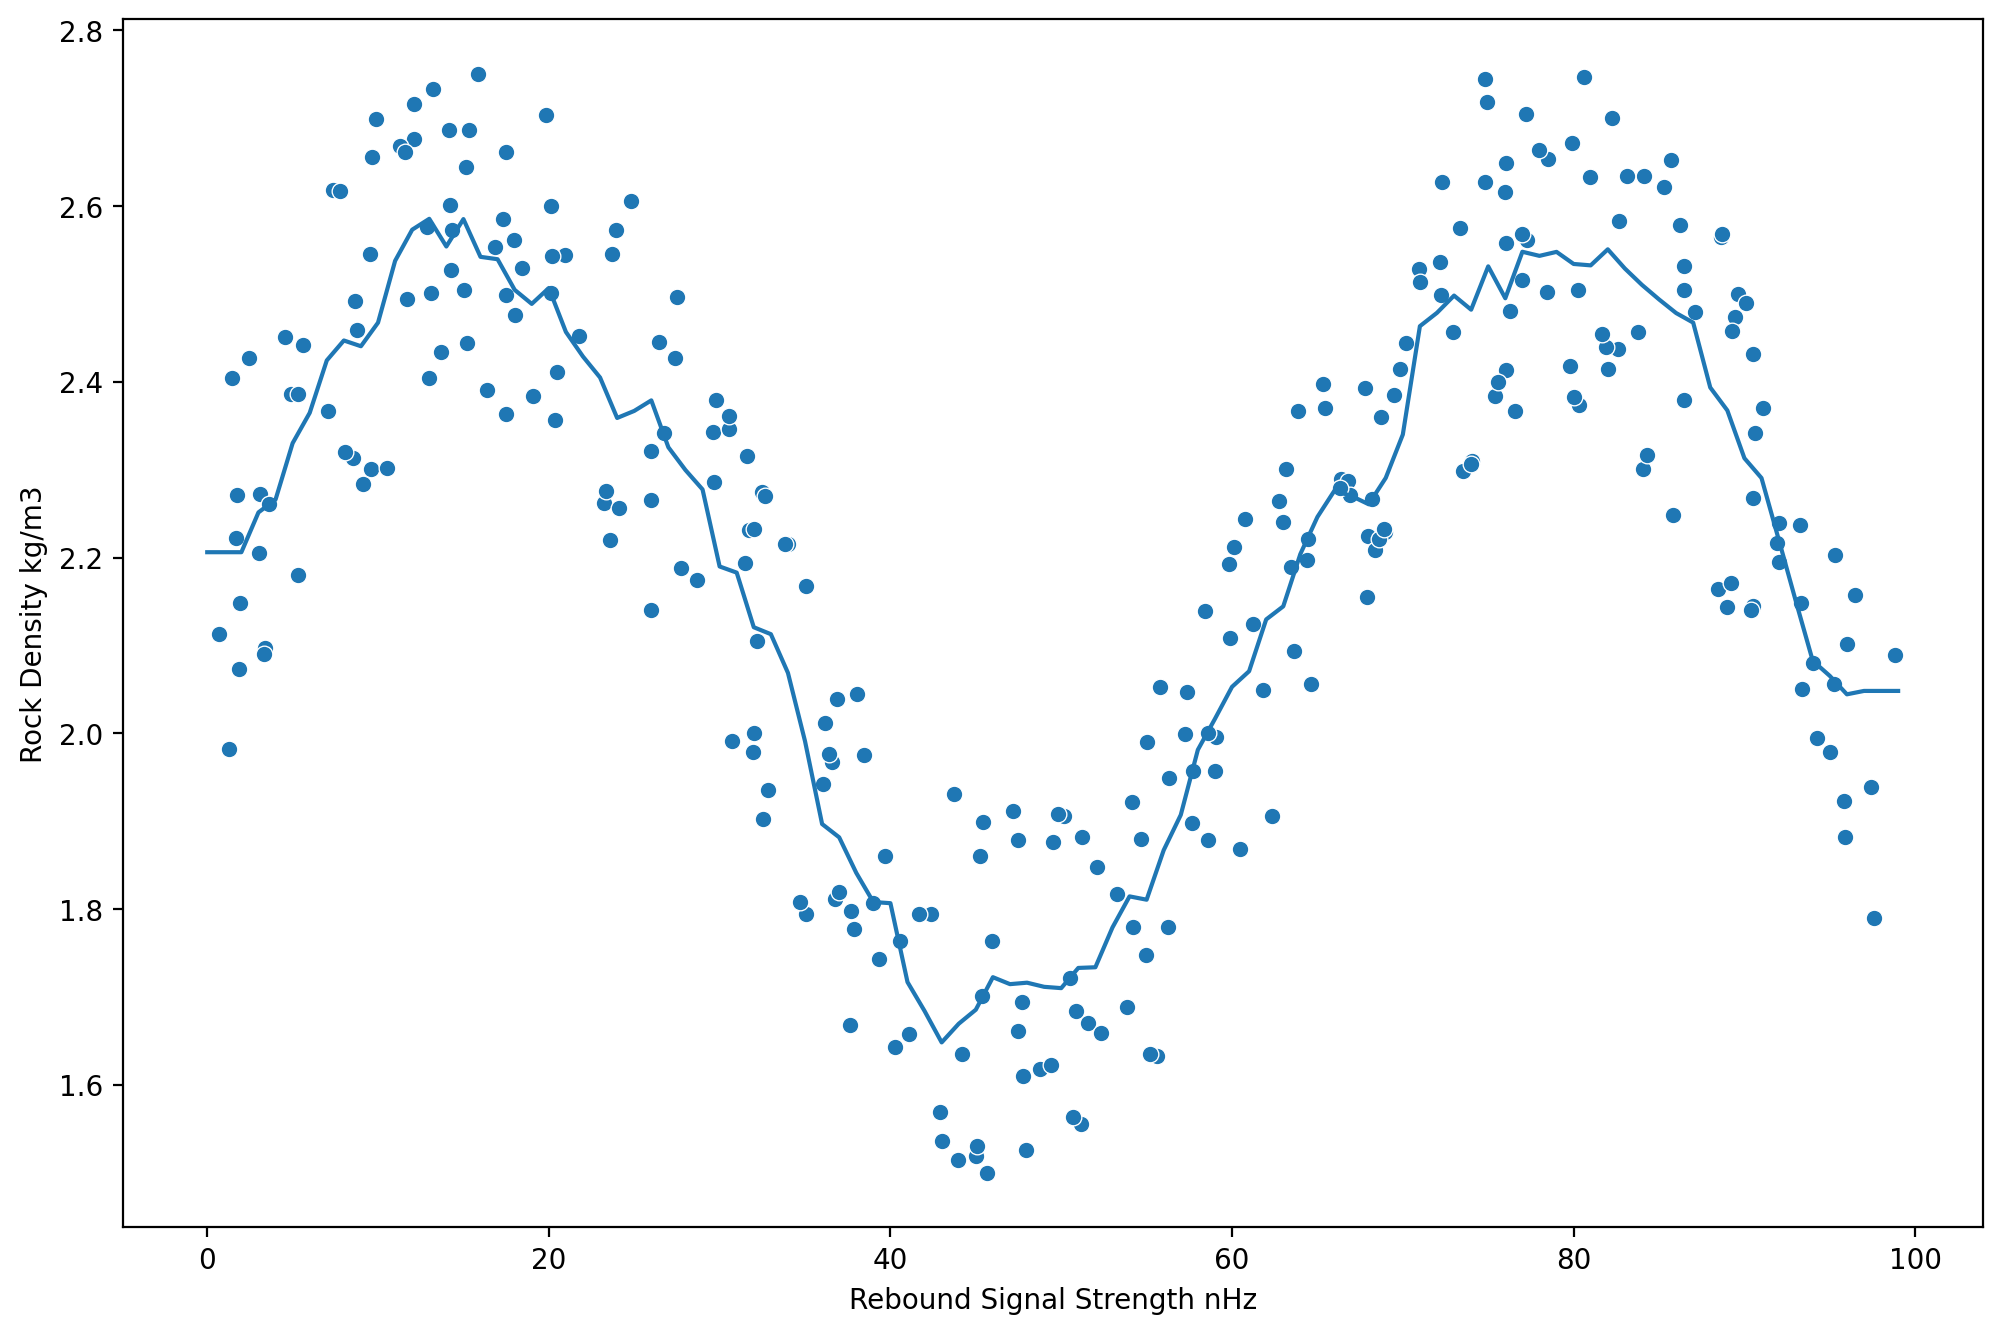

In [56]:
# pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
# ModelSelection(pipe,X_train,X_test,y_train,y_test)

from sklearn.neighbors import KNeighborsRegressor



k_values = [1,5,10]

for n in k_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    ModelSelection(knn,X_train, X_test, y_train, y_test)

    


The RMSE is: 0.1523487028635337
The MAE is: 0.11877297474442378


C:\Users\aarav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


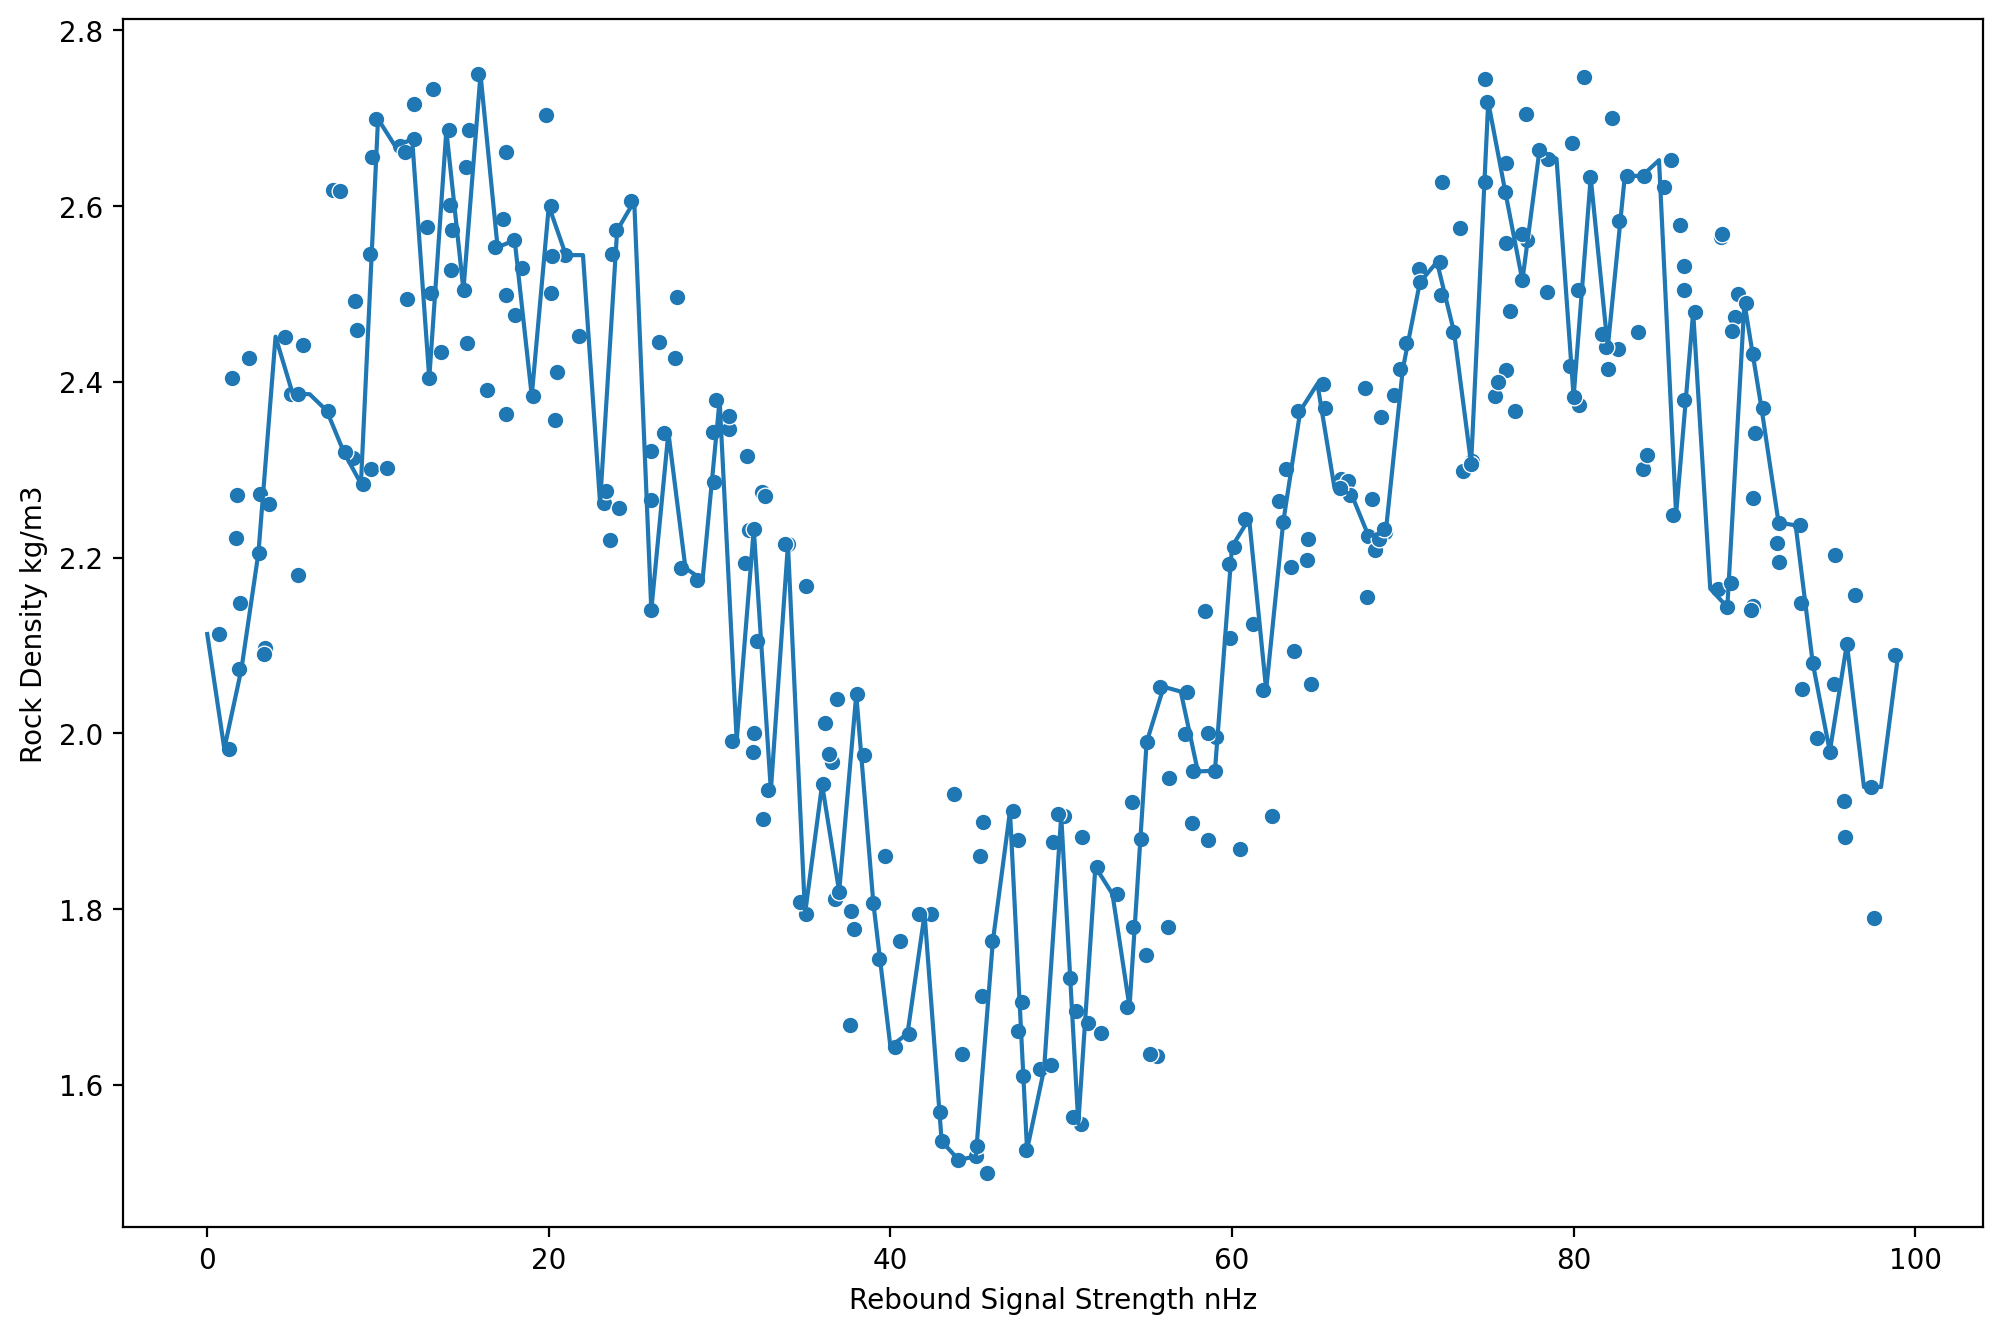

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
ModelSelection(dt_model,X_train, X_test, y_train, y_test)


In [60]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [63]:
SVR_model = SVR()

In [61]:
param_grid = {'C': [0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}

In [64]:
grid_model = GridSearchCV(SVR_model,param_grid,cv=5)

The RMSE is: 0.12646999302046696
The MAE is: 0.10854210121348368


C:\Users\aarav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


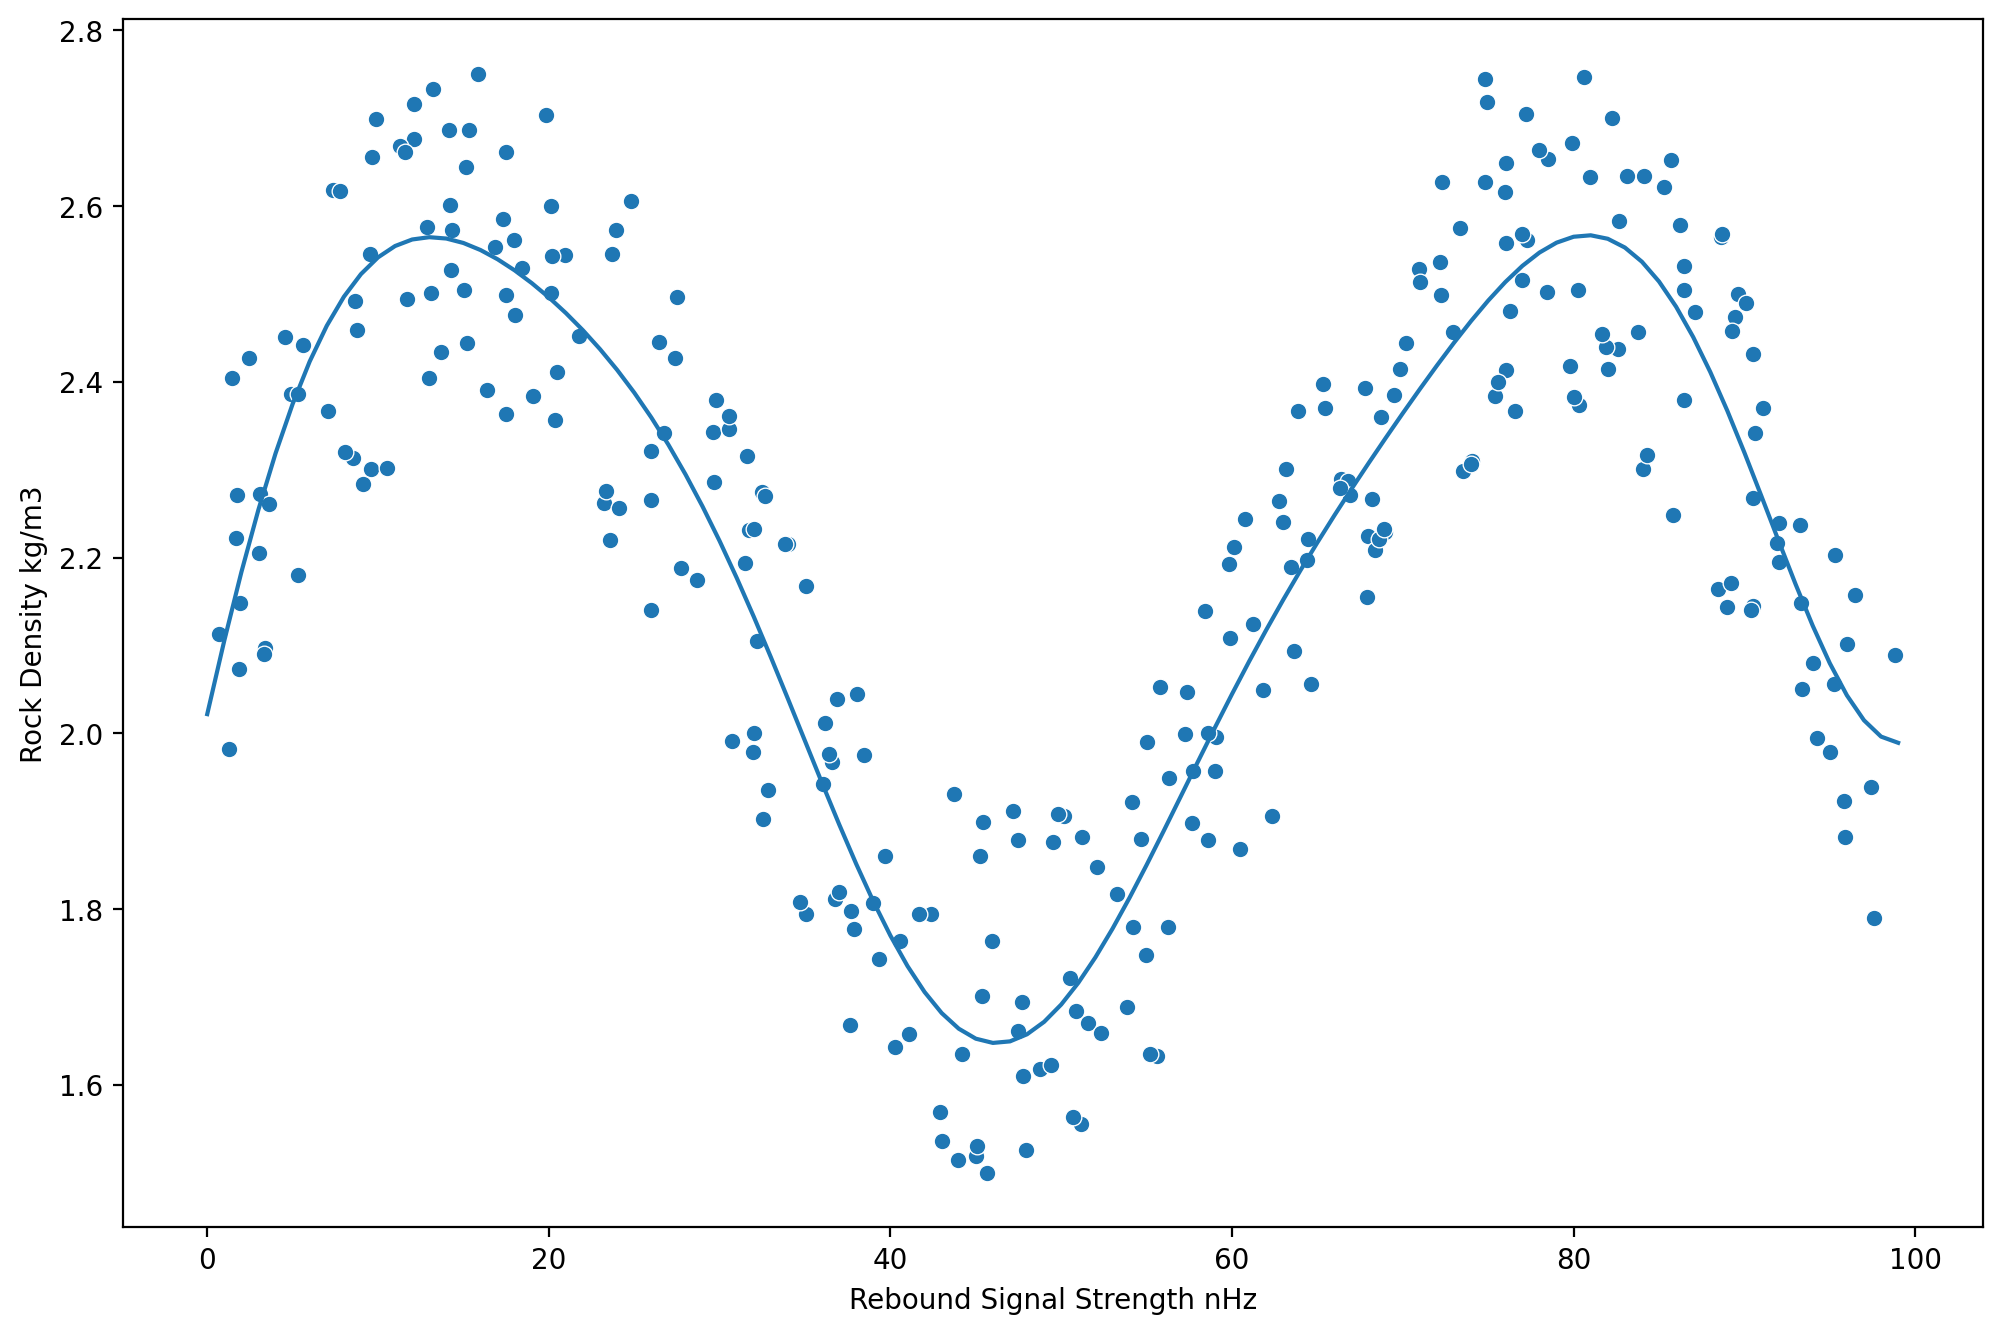

In [65]:
ModelSelection(grid_model,X_train, X_test, y_train, y_test)

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rfr = RandomForestRegressor(n_estimators=10)

The RMSE is: 0.13658397400804034
The MAE is: 0.10964738295664798


C:\Users\aarav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


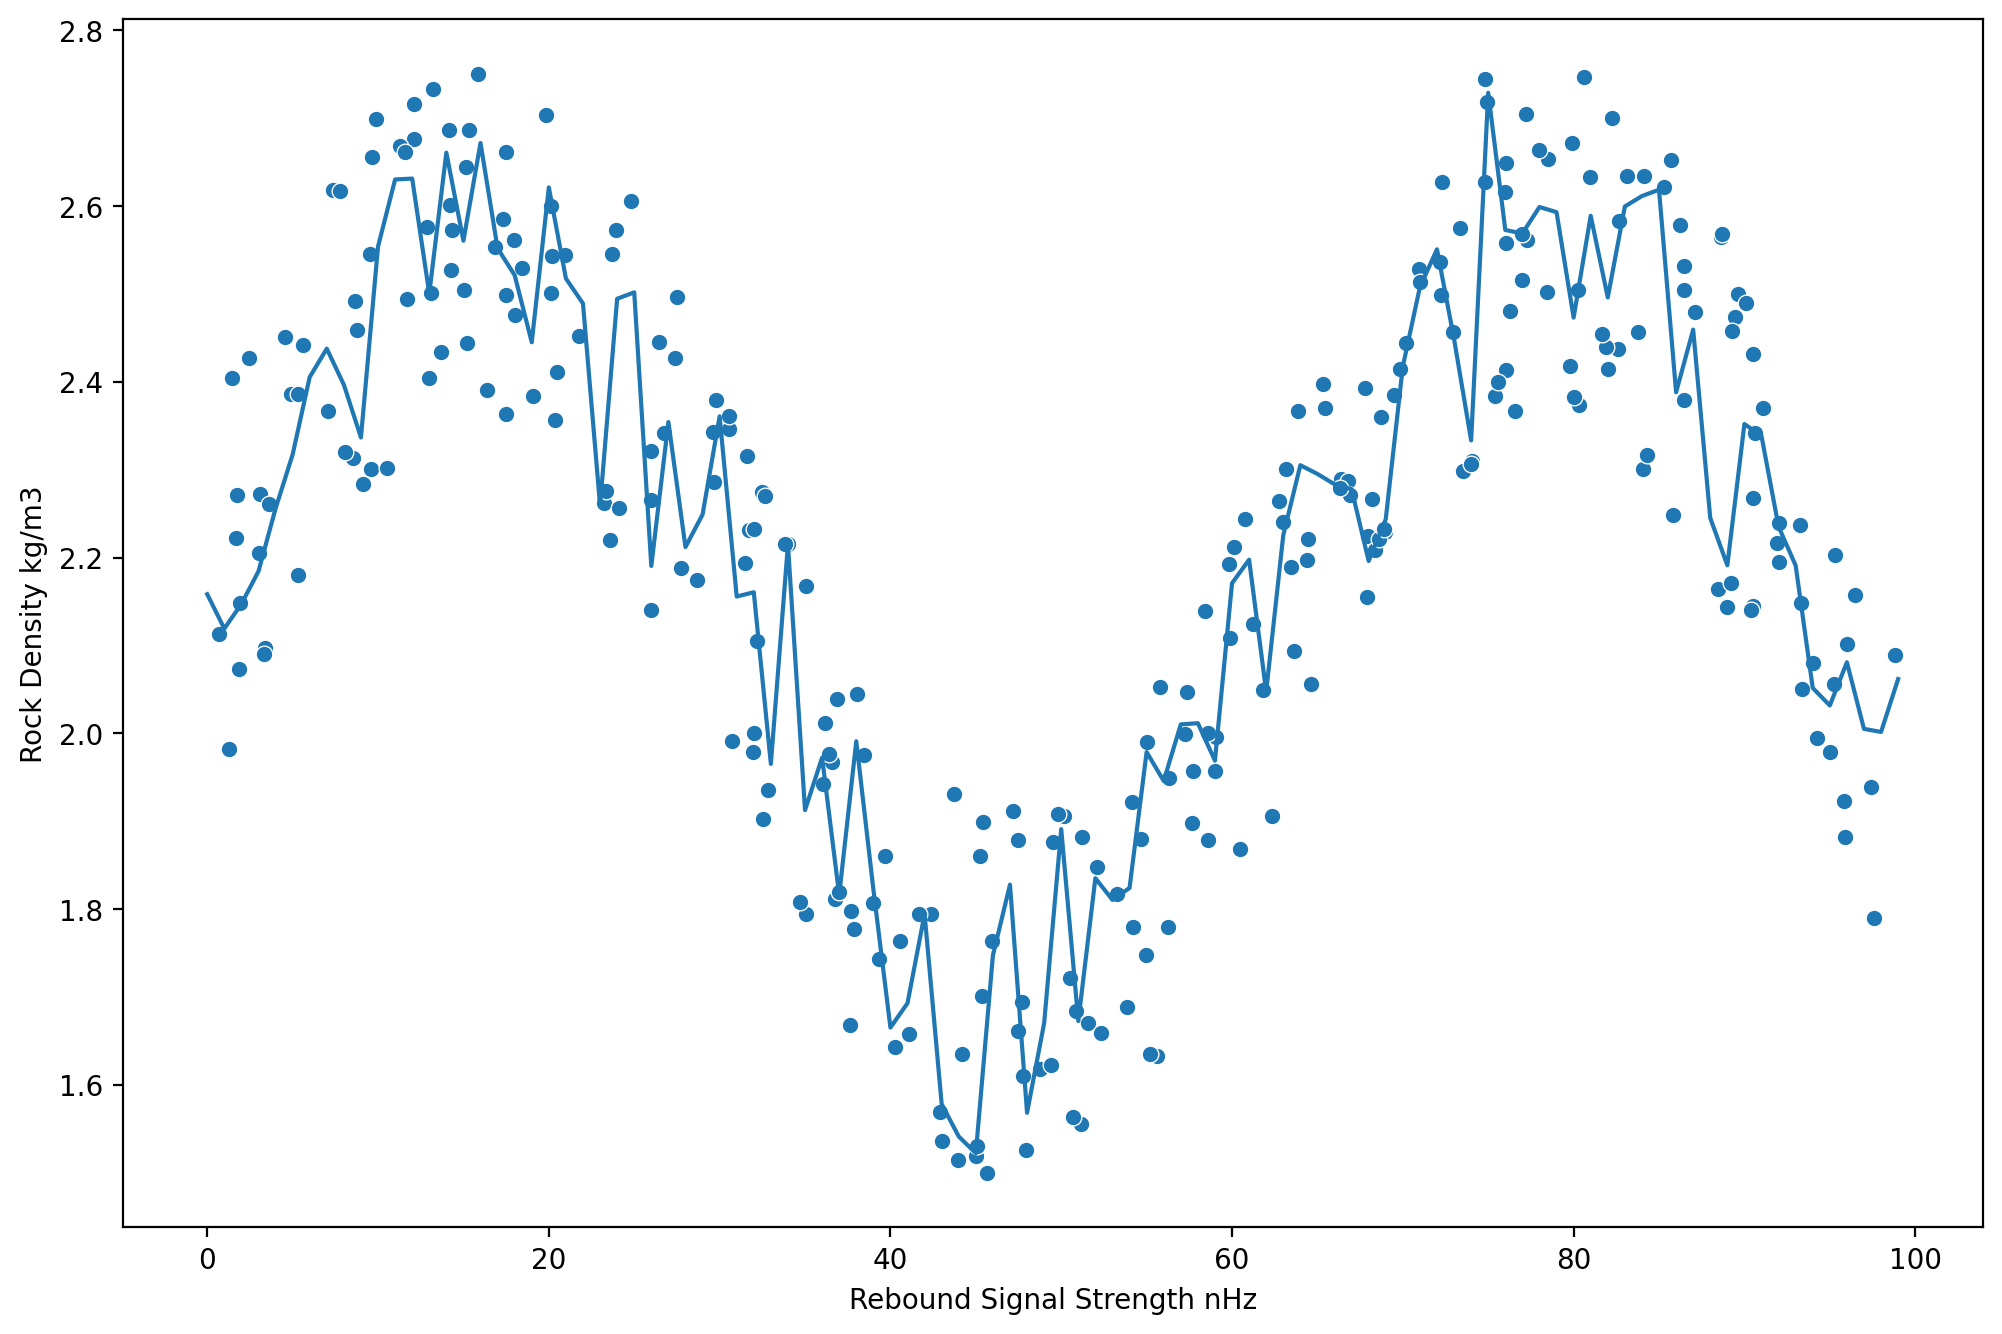

In [68]:
ModelSelection(rfr,X_train, X_test, y_train, y_test)